### Importamos las librerias que vamos a utilizar

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_classification
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

### El objetivo de predición será el número de followers mediante  Supervised Learning

### Comparativa entre los modelos Linear Regresion - Random Forest - XGBoost

### Preparación de los datos

In [5]:
# abrimos nuestro dataset con los datos sacados de la API
data_followers = pd.read_csv("dataset/data_enrinch.csv")

In [6]:
data_followers.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genre,followers
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"['classical', 'post-romantic era', 'russian ro...",419638.0
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,[],395.0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,[],164.0
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,[],30.0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,[],18.0


In [7]:
# dropeamos las columnas que no vamos a usar
data_followers_clean = data_followers.drop(columns=["id","genre", "name", "artists","release_date","key", "explicit", "mode"])
data_followers_clean

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,followers
0,0.0594,1921,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,4,0.0366,80.954,419638.0
1,0.9630,1921,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,5,0.4150,60.936,395.0
2,0.0394,1921,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,5,0.0339,110.339,164.0
3,0.1650,1921,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,3,0.0354,100.109,30.0
4,0.2530,1921,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,2,0.0380,101.665,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,72,0.0881,105.029,15331848.0
170649,0.7340,2020,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,68,0.0605,137.936,545501.0
170650,0.6370,2020,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,76,0.0809,91.688,2764634.0
170651,0.1950,2020,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,70,0.3080,75.055,39829471.0


In [8]:
# vemos que hay un valor nulo en followers
data_followers_clean.isnull().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
popularity          0
speechiness         0
tempo               0
followers           1
dtype: int64

In [9]:
data_followers_clean_n=data_followers_clean.fillna(value=0, axis=1)
data_followers_clean_n.isnull().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
popularity          0
speechiness         0
tempo               0
followers           0
dtype: int64

In [10]:
data_followers_clean_n.isna().sum()

valence             0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
popularity          0
speechiness         0
tempo               0
followers           0
dtype: int64

In [11]:
corr = data_followers_clean.corr()
corr

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,followers
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.198501,0.003832,0.313512,0.014200,0.046381,0.171689,-0.044267
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,-0.272371,-0.057318,0.487697,0.862442,-0.167816,0.141048,0.266824
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,0.329819,-0.024482,-0.561696,-0.573162,-0.043980,-0.207120,-0.204939
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,-0.278063,-0.100193,0.285057,0.199606,0.235491,0.001801,0.060507
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,0.084770,0.047168,-0.003037,0.059597,-0.084604,-0.025472,0.025336
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,-0.281101,0.126192,0.782362,0.485005,-0.070555,0.250865,0.177611
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,1.000000,-0.047193,-0.408611,-0.296750,-0.121700,-0.105361,-0.106014
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,-0.047193,1.000000,0.056422,-0.076464,0.134667,0.007714,0.011164
loudness,0.313512,0.487697,-0.561696,0.285057,-0.003037,0.782362,-0.408611,0.056422,1.000000,0.457051,-0.139296,0.209774,0.195048
popularity,0.014200,0.862442,-0.573162,0.199606,0.059597,0.485005,-0.296750,-0.076464,0.457051,1.000000,-0.171979,0.133310,0.293067


In [12]:
# miramos las correlaciones con repecto al numero de followers que va a ser la variable a predecir
corr["followers"].sort_values()

acousticness       -0.204939
instrumentalness   -0.106014
valence            -0.044267
speechiness        -0.011978
liveness            0.011164
duration_ms         0.025336
tempo               0.039646
danceability        0.060507
energy              0.177611
loudness            0.195048
year                0.266824
popularity          0.293067
followers           1.000000
Name: followers, dtype: float64

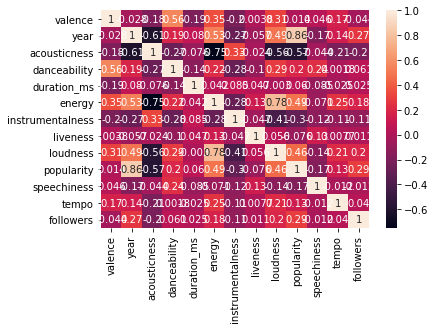

In [13]:
sns.heatmap(corr, annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Linear Regression

### Estandarización de los datos

In [14]:
scaler = StandardScaler()

In [70]:
X = data_followers_clean_n.drop(columns=['followers'])
y = data_followers_clean_n['followers']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
transformer = StandardScaler().fit(X_train)
X_scaled_test = transformer.transform(X_test)
X_scaled_train = transformer.transform(X_train)

In [71]:
X_train.head()

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
160109,0.871,1967,0.0946,0.568,162707,0.618,0.000000,0.6020,-9.209,19,0.0375,122.583
100452,0.250,1978,0.8130,0.511,166360,0.385,0.000002,0.1750,-11.342,27,0.3510,76.983
166865,0.811,2002,0.0270,0.850,246200,0.893,0.000000,0.0796,-6.496,35,0.1850,105.522
124995,0.248,1926,0.9860,0.417,571493,0.185,0.847000,0.3750,-16.971,0,0.0332,108.498
131375,0.225,1973,0.4540,0.317,207813,0.563,0.000284,0.2020,-6.209,43,0.0376,83.561


In [72]:
y_train.head()

160109     649718.0
100452      63805.0
166865      18406.0
124995    2204441.0
131375      75562.0
Name: followers, dtype: float64

In [73]:
lr= LinearRegression()

In [74]:
lr.fit(X_scaled_train, y_train)

LinearRegression()

In [75]:
y_pred = lr.predict(X_test)

In [76]:
y_pred

array([-3.72308193e+09, -3.25399367e+09, -4.46868572e+09, ...,
       -3.96158512e+09, -5.99442895e+09, -3.62170379e+09])

In [77]:
r2_score(y_test,y_pred)

-1198671.8223385785

In [78]:
mean_squared_error(y_test, y_pred)**0.5

5521523002.458926

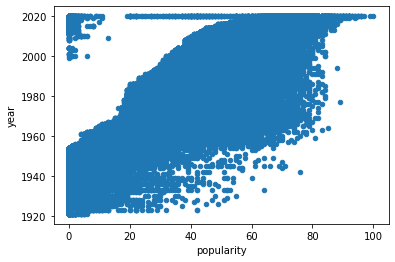

In [22]:
data_followers_clean_n.plot.scatter('popularity', 'year')

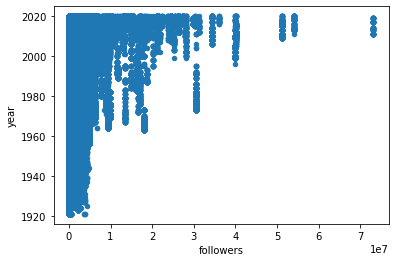

In [23]:
data_followers_clean_n.plot.scatter('followers', 'year')

### Random Forest Regression

In [24]:
data_followers_clean_n

,valence,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,followers
0,0.0594,1921,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,4,0.0366,80.954,419638.0
1,0.9630,1921,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,5,0.4150,60.936,395.0
2,0.0394,1921,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,5,0.0339,110.339,164.0
3,0.1650,1921,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,3,0.0354,100.109,30.0
4,0.2530,1921,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,2,0.0380,101.665,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,72,0.0881,105.029,15331848.0
170649,0.7340,2020,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,68,0.0605,137.936,545501.0
170650,0.6370,2020,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,76,0.0809,91.688,2764634.0
170651,0.1950,2020,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,70,0.3080,75.055,39829471.0


In [79]:
#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor()#max_depth=2, random_state=0)
regr.fit(X_train, y_train)
RandomForestRegressor()

RandomForestRegressor()

In [80]:
predictions = regr.predict(X_test)
predictions

array([  71003.35,  589935.38, 1979986.83, ...,   39288.15, 1037603.65,
        170325.09])

In [81]:
mean_squared_error(y_test, predictions)

19510139474407.152

In [57]:
errors = abs(predictions - y)
errors

array([20.20388769, 15.89847359,  2.70652052,  9.95115586, 23.11276816,
       36.45738729, 17.1427371 , 21.54608688, 42.23668394,  8.54514664,
       27.9253326 ,  3.80609926, 13.46668459, 15.25331878,  1.30370895,
        4.21050833,  5.21709175,  1.74686867,  4.46486278,  4.84443539,
       10.84572495, 34.52762894, 18.3087916 ,  2.74480859, 19.41056136,
        8.35744858,  4.01657303, 28.27898771,  7.78745951, 13.90130403,
       11.3245798 ,  4.27546516,  7.66492942,  2.33983021,  7.34409151,
       21.83869108, 27.85987443, 11.01826245, 10.7215947 ,  2.19952555,
       15.89533634, 11.68276188, 14.97974737,  6.33425463,  7.2461082 ,
       14.45782738, 14.1764386 ,  2.26142535, 10.77260755, 15.14142158,
       11.29723874, 14.3801759 ,  5.36352947, 10.40793642,  0.42649768,
        0.89049758, 12.76864923,  7.39237122,  9.41027396, 18.22413611,
        3.30204097, 22.70103092, 23.13561229,  7.69289911, 21.05810581,
        8.90091675, 27.02024069,  5.62241194, 24.81633038,  8.45

In [58]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 12.67 degrees.


In [59]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 36.65 %.
